In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### 1. Convert Color Image to Grey Scale

In [465]:
original_img=cv2.imread("Lenna.png",-1)
gray_scale_img=cv2.cvtColor(original_img,cv2.COLOR_BGR2GRAY)

Text(0.5, 1.0, 'Original Color Image')

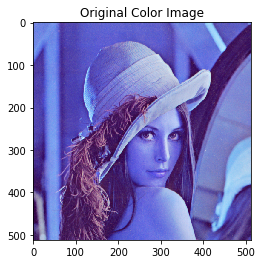

In [466]:
plt.imshow(original_img)
plt.title("Original Color Image")

Text(0.5, 1.0, 'Gray Scale')

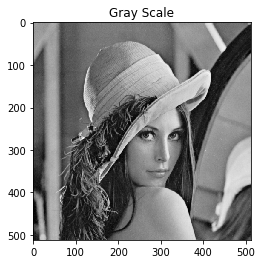

In [467]:
plt.imshow(gray_scale_img,cmap="gray")
plt.title("Gray Scale")

### 2. Histogram Equlization

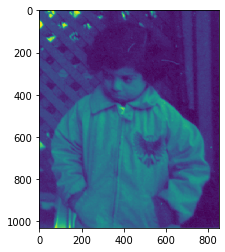

In [471]:
img=cv2.imread('kid.jpg',0)
plt.imshow(img)

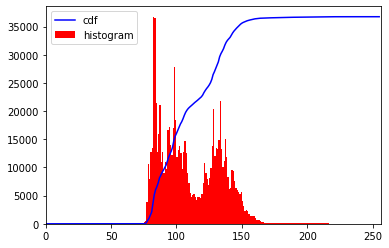

In [472]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

Text(0.5, 1.0, 'Equalized Image on the Right')

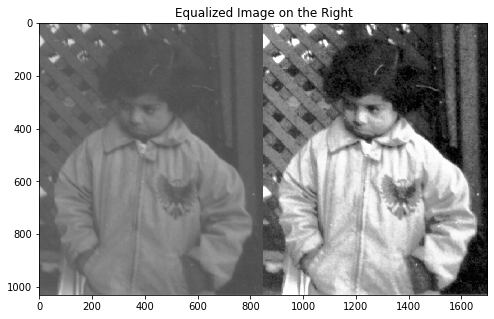

In [473]:
result_image=cv2.equalizeHist(img)
plt.figure(figsize=(10,5))
plt.imshow(np.hstack([img,result_image]),cmap="gray")
plt.title("Equalized Image on the Right")

### 3. Image Enhancement
* Change Brightness
* Change Contrast

In [76]:
img=cv2.imread('kid.jpg',-1)

Text(0.5, 1.0, 'Original Image')

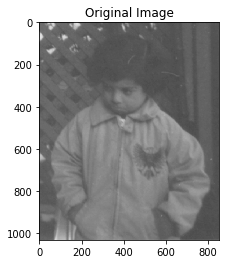

In [77]:
plt.imshow(img)
plt.title("Original Image")

In [78]:
img.shape

(1031, 850, 3)

In [79]:
def adjust_brightness(image,value):
    e_image=image.copy()
    e_image += np.array([value]).astype(np.uint8)
    #Handling Overflow
    e_image = np.clip(e_image,a_min=0,a_max=255)
    return e_image

Text(0.5, 1.0, 'Original Image vs Brightness Enhanced Image')

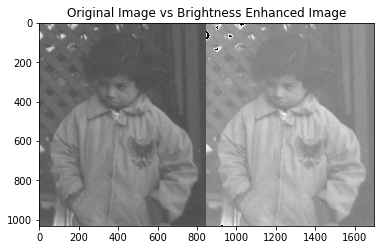

In [125]:
e_image = adjust_brightness(img,50)
plt.imshow(np.hstack([img,e_image]))
plt.title("Original Image vs Brightness Enhanced Image")

In [126]:
def adjust_contrast(image, value):
    e_image = image.copy()
    e_image = np.multiply(image,np.array([value]).astype(np.uint8))
    e_image = np.clip(e_image,a_min=0,a_max=255)
    return e_image

Text(0.5, 1.0, 'Original vs Contrast Enhanced Image')

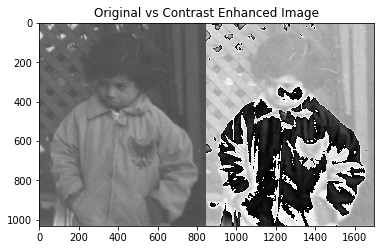

In [129]:
e_image=adjust_contrast(img,2)
plt.imshow(np.hstack([img,e_image]))
plt.title("Original vs Contrast Enhanced Image")

Text(0.5, 1.0, 'Original vs Brightness & Contrast Enhanced Image')

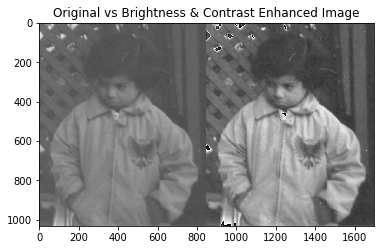

In [130]:
e_image=adjust_brightness(img,-50)
e_image=adjust_contrast(e_image,2)
plt.imshow(np.hstack([img,e_image]))
plt.title("Original vs Brightness & Contrast Enhanced Image")

### 4. Image Sampling

In [230]:
img=cv2.imread('standard_test_images/lena_gray_256.tif',-1)

Text(0.5, 1.0, 'Lenna Original Image with dim 256*256')

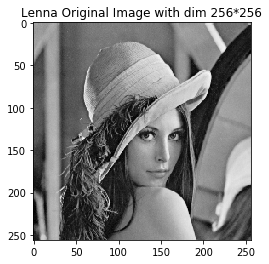

In [231]:
plt.imshow(img,cmap='gray')
plt.title("Lenna Original Image with dim 256*256")

In [232]:
img.shape

(256, 256)

In [233]:
def change_spatial_resolution(image,factor):
    dim_x=image.shape[0]
    dim_y=image.shape[1]
    e_image=np.zeros((dim_x//factor,dim_y//factor)).astype(np.uint8)
    print(e_image.shape)
    r=0
    for i in range(0,dim_x,factor):
        c=0
        done=False
        for j in range(0,dim_y,factor):
            if r >= e_image.shape[0] or c >= e_image.shape[1]:
                done=True
                break
            e_image[r][c]=image[i][j]
            c=c+1
        r=r+1
        if done:
            break
    return e_image

(128, 128)


Text(0.5, 1.0, 'Lenna Modified Image with spatial resolutions 128*128 from 256*256')

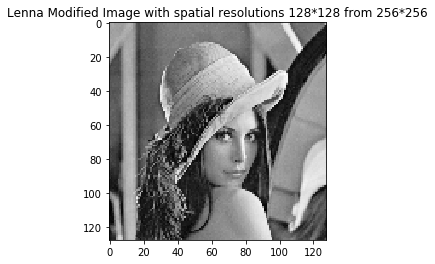

In [234]:
e_image_128=change_spatial_resolution(img,2)
plt.imshow(e_image_128,cmap='gray')
plt.title("Lenna Modified Image with spatial resolutions 128*128 from 256*256")

(64, 64)


Text(0.5, 1.0, 'Lenna Image Modified Image with spatial resolutions 64*64 from 256*256')

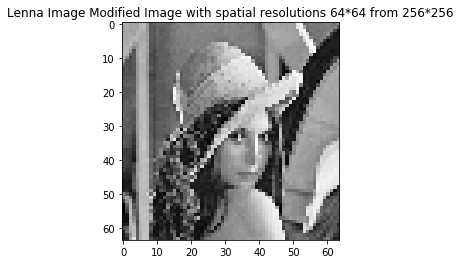

In [235]:
e_image_64=change_spatial_resolution(img,4)
plt.imshow(e_image_64,cmap='gray')
plt.title("Lenna Image Modified Image with spatial resolutions 64*64 from 256*256")

In [236]:
def resize_inc(image,dim):
    factor=dim/image.shape[0]
    res_image=np.zeros((dim,dim)).astype(np.uint8)
    ik=jk=-1
    done=False
    for i in range(dim):
        if ik>=image.shape[0]:
            break
        if i%factor==0:
            ik=ik+1
        for j in range(dim):
            if jk>=image.shape[1]:
                done=True
                break
            if j%factor==0:
                jk=(jk+1)%image.shape[1]
            res_image[i][j]=image[ik][jk]
        if done:
            break
    return res_image

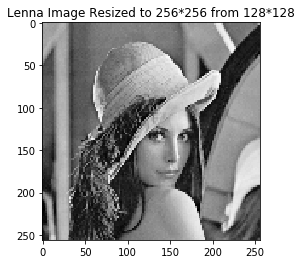

In [237]:
res_img_256=resize_inc(e_image_128,256)
plt.title("Lenna Image Resized to 256*256 from 128*128")
plt.imshow(res_img_256,cmap="gray")

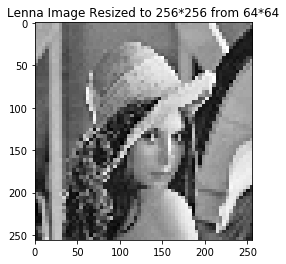

In [238]:
res_img_256=resize_inc(e_image_64,256)
plt.title("Lenna Image Resized to 256*256 from 64*64")
plt.imshow(res_img_256,cmap="gray")

In [239]:
img_pepper=cv2.imread('standard_test_images/peppers_gray.tif',-1)

Text(0.5, 1.0, 'Pepper Gray 512*512')

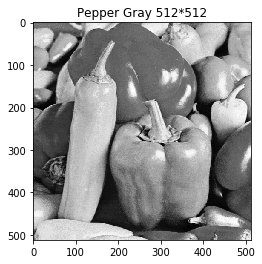

In [241]:
plt.imshow(img_pepper,cmap="gray")
plt.title("Pepper Gray 512*512")

In [242]:
e_img_pepper_256=change_spatial_resolution(img_pepper,factor=2)

(256, 256)


Text(0.5, 1.0, 'Pepper Image from 512*512 to 256*256')

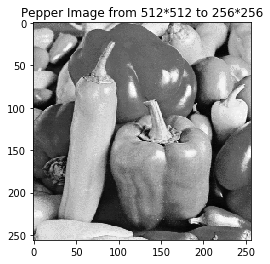

In [243]:
plt.imshow(e_img_pepper_256,cmap="gray")
plt.title("Pepper Image from 512*512 to 256*256")

In [244]:
e_img_pepper_128=change_spatial_resolution(img_pepper,factor=4)

(128, 128)


Text(0.5, 1.0, 'Pepper Image from 512*512 to 128*128')

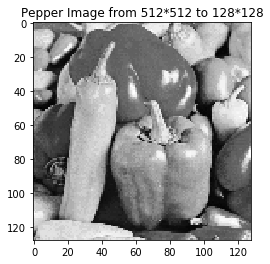

In [246]:
plt.imshow(e_img_pepper_128,cmap="gray")
plt.title("Pepper Image from 512*512 to 128*128")

Text(0.5, 1.0, 'Pepper Image Resized from 256*256 to 512*512')

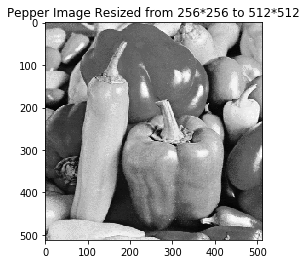

In [329]:
res_img_pepper_from_256=resize_inc(e_img_pepper_256,512)
plt.imshow(res_img_pepper_from_256,cmap="gray")
plt.title("Pepper Image Resized from 256*256 to 512*512")

Text(0.5, 1.0, 'Pepper Image Resized from 128*128 to 512*512')

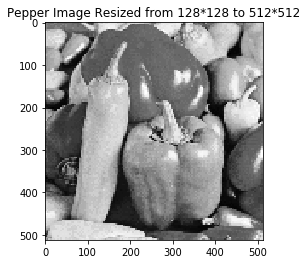

In [330]:
res_img_pepper_from_128=resize_inc(e_img_pepper_128,512)
plt.imshow(res_img_pepper_from_128,cmap="gray")
plt.title("Pepper Image Resized from 128*128 to 512*512")

### 5. Image Quantization

In [300]:
def quantize(image,L):
    k= 256 // L
    e_image=image.copy()
    e_image=np.divide(e_image,k).astype(np.uint8)
    return np.clip(e_image,a_min=1,a_max=L)

In [301]:
img_lenna=cv2.imread('standard_test_images/lena_gray_256.tif',-1)

Text(0.5, 1.0, 'Lenna, L=256')

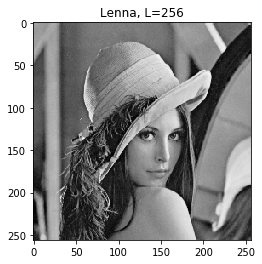

In [302]:
plt.imshow(img_lenna,cmap="gray")
plt.title("Lenna, L=256")

In [303]:
img_pepper=cv2.imread('standard_test_images/peppers_gray.tif')

Text(0.5, 1.0, 'Lenna, L=256')

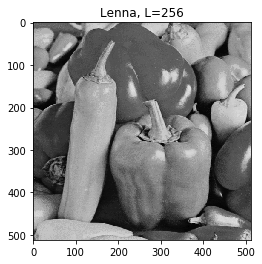

In [304]:
plt.imshow(img_pepper,cmap="gray")
plt.title("Lenna, L=256")

In [317]:
img_lenna_l_128=quantize(img_lenna,L=128)
img_lenna_l_32=quantize(img_lenna,L=32)
img_lenna_l_8=quantize(img_lenna, L=8)
img_lenna_l_2=quantize(img_lenna,L=2)
img_pepper_l_128=quantize(img_pepper,L=128)
img_pepper_l_32=quantize(img_pepper,L=32)
img_pepper_l_8=quantize(img_pepper,L=8)
img_pepper_l_2=quantize(img_pepper,L=2)

#### 1)L=128

Text(0.5, 1.0, 'Lenna Image at L=128')

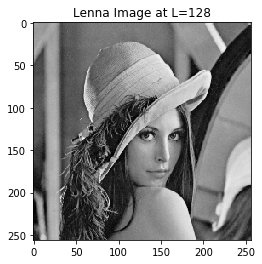

In [318]:
plt.imshow(img_lenna_l_128,cmap="gray")
plt.title("Lenna Image at L=128")

Text(0.5, 1.0, 'Pepper Image at L=128')

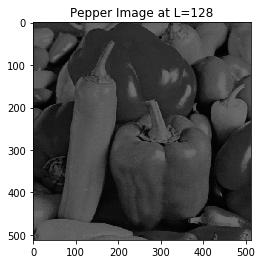

In [319]:
plt.imshow(img_pepper_l_128,cmap="gray")
plt.title("Pepper Image at L=128")

#### 2) L=32

Text(0.5, 1.0, 'Lenna Image at L=32')

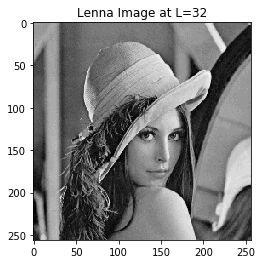

In [320]:
plt.imshow(img_lenna_l_32,cmap="gray")
plt.title("Lenna Image at L=32")

Text(0.5, 1.0, 'Lenna Image at L=32')

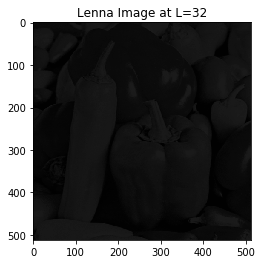

In [321]:
plt.imshow(img_pepper_l_32,cmap="gray")
plt.title("Lenna Image at L=32")

#### 3) L=8

Text(0.5, 1.0, 'Lenna Image at L=8')

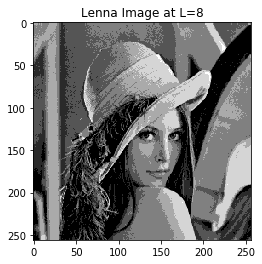

In [322]:
plt.imshow(img_lenna_l_8,cmap="gray")
plt.title("Lenna Image at L=8")

Text(0.5, 1.0, 'Pepper Image at L=8')

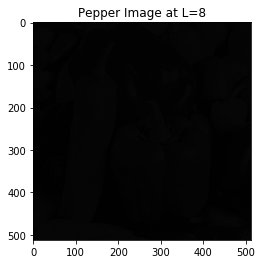

In [323]:
plt.imshow(img_pepper_l_8,cmap="gray")
plt.title("Pepper Image at L=8")

#### 4) L=2

Text(0.5, 1.0, 'Lenna Image at L=2')

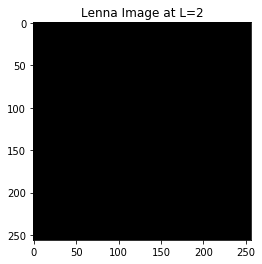

In [324]:
plt.imshow(img_lenna_l_2,cmap="gray")
plt.title("Lenna Image at L=2")

Text(0.5, 1.0, 'Pepper Image at L=2')

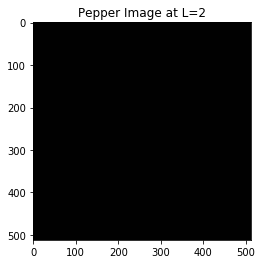

In [325]:
plt.imshow(img_pepper_l_22,cmap="gray")
plt.title("Pepper Image at L=2")

### 6.Image Smoothing

#### 1) Gaussian Filter

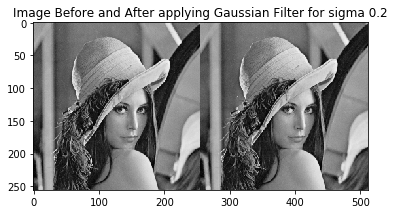

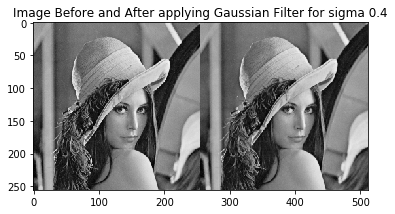

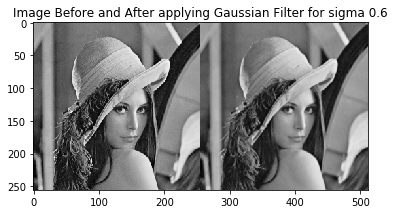

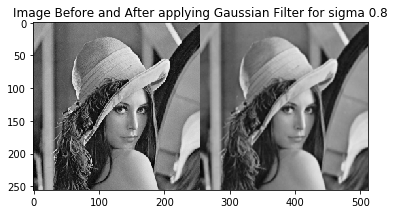

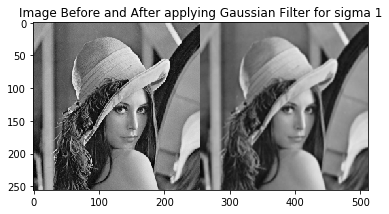

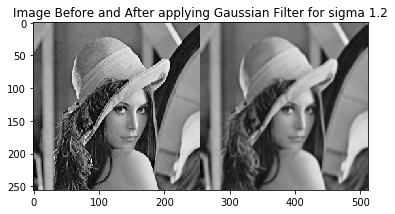

In [474]:
lamd=[0.2,0.4,0.6,0.8,1,1.2]
for l in lamd:
    img_lenna_gauss_filter = cv2.GaussianBlur(img_lenna,(5,5),l)
    plt.imshow(np.hstack([img_lenna,img_lenna_gauss_filter]),cmap="gray")
    plt.title("Image Before and After applying Gaussian Filter for sigma "+str(l))
    plt.show()

#### 2) Median Filtering

Text(0.5, 1.0, 'Image Before and After Median Filter')

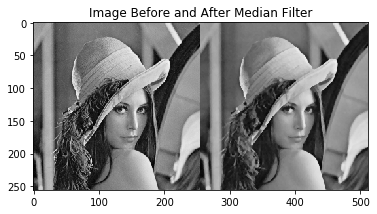

In [355]:
median_filter_lenna=cv2.medianBlur(img_lenna,3)
plt.imshow(np.hstack([img_lenna,median_filter_lenna]),cmap="gray")
plt.title("Image Before and After Median Filter")
o

#### 3) Average Filter

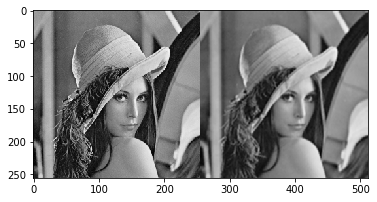

In [463]:
average_filter_lenna=cv2.blur(img_lenna,(3,3))
plt.imshow(np.hstack([img_lenna,average_filter_lenna]),cmap="gray")

### 7. Image Sharpening

#### 1. Apply Laplacian Masks

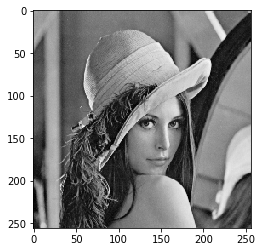

In [464]:
laplacian_mask_lenna=cv2.Laplacian(img_lenna,cv2.CV_16S, ksize=3)
plt.imshow(img_lenna,cmap="gray")

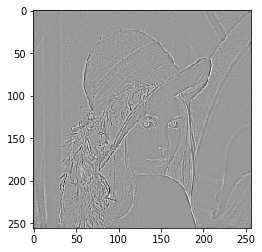

In [358]:
plt.imshow(laplacian_mask_lenna,cmap="gray")

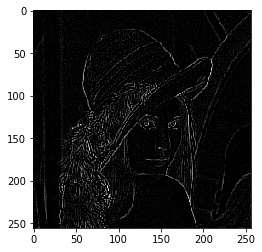

In [366]:
laplacian_mask_lenna=cv2.Laplacian(img_lenna,cv2.CV_16U, ksize=3)
plt.imshow(laplacian_mask_lenna,cmap="gray")

#### 2. Unsharp Masking and High Boost Filtering

In [373]:
def unsharp_masking(image):
    res_image=image.copy()
    blurred=cv2.GaussianBlur(image,(3,3),0)
    difference=cv2.subtract(res_image,blurred)
    return difference

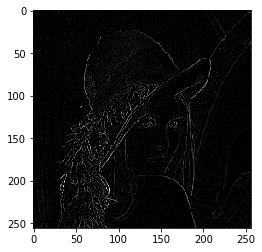

In [374]:
unsharp_masking_img=unsharp_masking(img_lenna)
plt.imshow(unsharp_masking_img,cmap="gray")

In [424]:
def high_boost_filtering(image, A):
    unsharp_masked_image=unsharp_masking(image)
    f_image=cv2.subtract(np.clip(np.multiply(A,image).astype(np.uint8),a_min=0,a_max=255),unsharp_masked_image)
    return f_image

In [459]:
hbf_image=high_boost_filtering(img_lenna,1)

Text(0.5, 1.0, 'Original Image vs High Boost filtered Image')

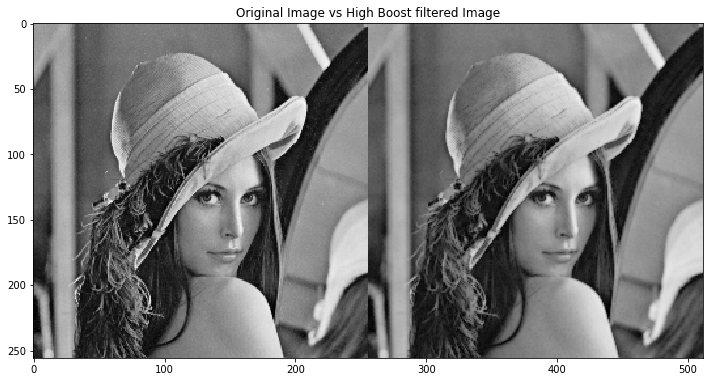

In [461]:
plt.figure(figsize=(12,12))
plt.imshow(np.hstack([img_lenna,hbf_image]),cmap="gray")
plt.title("Original Image vs High Boost filtered Image")